## Frequency Category Imputation-
Technique is to replace the NAN values with most frequent category in categorical feature column

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"D:\Road to Data Science\ASSIGNMENTS SUBMITTED\DataSets Given In Class\ML DATA\Loan.csv.csv",usecols=['BsmtQual','FireplaceQu','GarageType'])
df

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd
...,...,...,...
1455,Gd,TA,Attchd
1456,Gd,TA,Attchd
1457,TA,Gd,Attchd
1458,TA,NaN,Attchd


In [24]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
dtype: int64

In [27]:
most=df['BsmtQual'].value_counts().index[0]

In [28]:
most

'TA'

In [30]:
def impute_nan(df,variable):
    most_frequent=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent,inplace=True)
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [31]:
df

,BsmtQual,FireplaceQu,GarageType
0,Gd,Gd,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd
...,...,...,...
1455,Gd,TA,Attchd
1456,Gd,TA,Attchd
1457,TA,Gd,Attchd
1458,TA,Gd,Attchd


<Axes: >

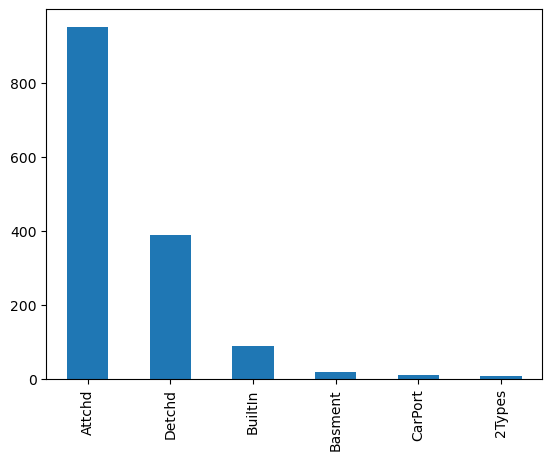

In [32]:
df['GarageType'].value_counts().plot.bar()

<Axes: >

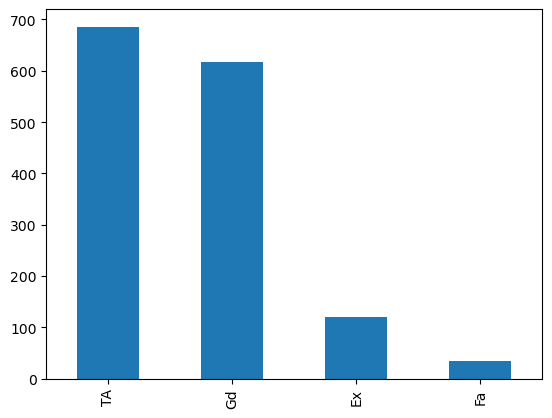

In [33]:
df['BsmtQual'].value_counts().plot.bar()

<Axes: >

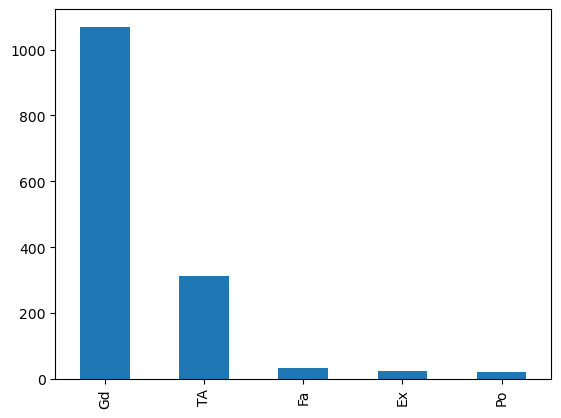

In [35]:
df['FireplaceQu'].value_counts().plot.bar()

#Advantages:-
1.Easy To implement.
2.Fast To implement

#Disadvantages:-1.Since we are using the frequent category to fill NAN,it may use them in a over-represented way if there is more NAN.
2.It distorts the relationship of frequent category and less frequent category

### Adding a variable to capture NAN

In [36]:
df1=pd.read_csv(r"D:\Road to Data Science\ASSIGNMENTS SUBMITTED\DataSets Given In Class\ML DATA\Loan.csv.csv",usecols=['BsmtQual','FireplaceQu','GarageType'])
df1

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd
...,...,...,...
1455,Gd,TA,Attchd
1456,Gd,TA,Attchd
1457,TA,Gd,Attchd
1458,TA,NaN,Attchd


In [37]:
import numpy as np
df1['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [38]:
df1

,BsmtQual,FireplaceQu,GarageType,BsmtQual_var
0,Gd,NaN,Attchd,0
1,Gd,TA,Attchd,0
2,Gd,TA,Attchd,0
3,TA,Gd,Detchd,0
4,Gd,TA,Attchd,0
...,...,...,...,...
1455,Gd,TA,Attchd,0
1456,Gd,TA,Attchd,0
1457,TA,Gd,Attchd,0
1458,TA,NaN,Attchd,0


In [39]:
df1['BsmtQual']=df1['BsmtQual'].mode()[0]

In [42]:
df1

,BsmtQual,FireplaceQu,GarageType,BsmtQual_var
0,TA,NaN,Attchd,0
1,TA,TA,Attchd,0
2,TA,TA,Attchd,0
3,TA,Gd,Detchd,0
4,TA,TA,Attchd,0
...,...,...,...,...
1455,TA,TA,Attchd,0
1456,TA,TA,Attchd,0
1457,TA,Gd,Attchd,0
1458,TA,NaN,Attchd,0


# Adding a new category to replace NAN value

In [44]:
df2=pd.read_csv(r"D:\Road to Data Science\ASSIGNMENTS SUBMITTED\DataSets Given In Class\ML DATA\Loan.csv.csv",usecols=['BsmtQual','FireplaceQu','GarageType'])

In [45]:
df2

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd
...,...,...,...
1455,Gd,TA,Attchd
1456,Gd,TA,Attchd
1457,TA,Gd,Attchd
1458,TA,NaN,Attchd


In [48]:
def impute_nan(df2,variable):
    df2[variable+"_var"]=np.where(df2[variable].isnull(),"Missing",df2[variable])
    
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df2,feature)


In [49]:
df2

,BsmtQual,FireplaceQu,GarageType,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,NaN,Attchd,Gd,Missing,Attchd
1,Gd,TA,Attchd,Gd,TA,Attchd
2,Gd,TA,Attchd,Gd,TA,Attchd
3,TA,Gd,Detchd,TA,Gd,Detchd
4,Gd,TA,Attchd,Gd,TA,Attchd
...,...,...,...,...,...,...
1455,Gd,TA,Attchd,Gd,TA,Attchd
1456,Gd,TA,Attchd,Gd,TA,Attchd
1457,TA,Gd,Attchd,TA,Gd,Attchd
1458,TA,NaN,Attchd,TA,Missing,Attchd


In [50]:
df2.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,Missing,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd
...,...,...,...
1455,Gd,TA,Attchd
1456,Gd,TA,Attchd
1457,TA,Gd,Attchd
1458,TA,Missing,Attchd
